In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

In [2]:
def is_number(s):
    try:
        float(s)
        return True
    except ValueError:
        pass
    try:
        import unicodedata
        for i in s:
            unicodedata.numeric(i)
        return True
    except (TypeError, ValueError):
        pass
    return False

In [3]:
file_names = os.listdir('data/')
file_names

['graphsage_reddit_Tue_Mar_21_08:39:02_2023.csv',
 'graphsage_products_3.0_Mon_Mar_20_21:54:59_2023.csv',
 'graphsage_products_3.0_Mon_Mar_20_18:04:46_2023.csv',
 'graphsage_reddit_2.0_Tue_Mar_21_14:18:24_2023.csv',
 'ladies_products_Tue_Mar_21_18:50:21_2023.csv',
 'ladies_products_0.25_Tue_Mar_21_18:55:13_2023.csv',
 'graphsage_reddit_2.0_Tue_Mar_21_08:08:23_2023.csv',
 'ladies_reddit_Tue_Mar_21_20:32:09_2023.csv',
 'ladies_products_3.0_Tue_Mar_21_18:40:53_2023.csv',
 'graphsage_products_Mon_Mar_20_16:31:19_2023.csv',
 'graphsage_reddit_0.25_Tue_Mar_21_06:04:24_2023.csv',
 'graphsage_products_1.0_Mon_Mar_20_17:22:37_2023.csv',
 'ladies_reddit_1.0_Tue_Mar_21_20:44:20_2023.csv',
 'ladies_products_0.5_Tue_Mar_21_17:50:25_2023.csv',
 'graphsage_products_0.5_Mon_Mar_20_18:55:12_2023.csv',
 'ladies_reddit_1.0_Tue_Mar_21_22:37:36_2023.csv',
 'ladies_reddit_0.5_Tue_Mar_21_22:05:11_2023.csv',
 'ladies_reddit_1.0_Tue_Mar_21_21:40:55_2023.csv',
 'ladies_products_0.25_Tue_Mar_21_18:20:30_2023.csv

In [4]:
from collections import defaultdict
dfs = defaultdict(list)
for name in file_names:
    key = name.split('_')[:3]
    if is_number(key[2]):
        dfs['_'.join(key)].append(pd.read_csv('data/' + name))
    else:
        dfs['_'.join(key[:2])].append(pd.read_csv('data/' + name))

In [5]:
dfs.keys()

dict_keys(['graphsage_reddit', 'graphsage_products_3.0', 'graphsage_reddit_2.0', 'ladies_products', 'ladies_products_0.25', 'ladies_reddit', 'ladies_products_3.0', 'graphsage_products', 'graphsage_reddit_0.25', 'graphsage_products_1.0', 'ladies_reddit_1.0', 'ladies_products_0.5', 'graphsage_products_0.5', 'ladies_reddit_0.5', 'graphsage_products_2.0', 'ladies_products_1.0', 'ladies_reddit_3.0', 'ladies_reddit_0.25', 'graphsage_reddit_0.5', 'graphsage_products_0.25', 'ladies_reddit_2.0', 'ladies_products_2.0', 'graphsage_reddit_1.0'])

In [6]:
def anlyze_data(dfs, epoch, prefix, title):
    plt.figure(figsize=(15, 8))
    x = range(epoch)
    keys = sorted(dfs.keys())
    for key in keys:
        if key.startswith(prefix):
            df_acc = pd.DataFrame()
            epochtrain_time = []
            presample_time = []
            e2e_time = []
            smallest_acc = 1
            largest_acc = 0
            for df in dfs[key]:
                df_acc[key] = df['acc'][:epoch]
                epochtrain_time.append(df['time/s'].mean())
                e2e_time.append(df['time/s'].sum())
                if key != prefix:
                    presample_time.append(df['presampling time/s'][0])
                smallest_acc = min(smallest_acc, df['acc'][epoch - 1])
                largest_acc = max(largest_acc, df['acc'][epoch - 1])
            mean_acc = df_acc.mean(axis=1)
            print(key)
            print('epoch train:', np.mean(epochtrain_time))
            if key != prefix:
                print('pre sample:', np.mean(presample_time))
            print('total train', np.mean(e2e_time))
            print('mean acc:', mean_acc[epoch - 1])
            print('worst acc:', smallest_acc)
            print('best acc:', largest_acc)
            print('below mean:', mean_acc[epoch - 1] - smallest_acc)
            print('above mean:', largest_acc - mean_acc[epoch - 1])
            if key == prefix:
                label = 'Online Sampling'
            else:
                label = 'Offline Sampling ({} Epoch)'.format(key.split('_')[-1])
            plt.plot(x, mean_acc, label=label)
    plt.grid(alpha=0.2)
    plt.ylabel('Validation Accuracy')
    plt.xlabel('Epoch')
    plt.title(title)
    plt.legend()
    plt.show()

graphsage_products
epoch train: 19.909339107513425
total train 995.4669553756714
mean acc: 0.9030338525772096
worst acc: 0.9027032852172852
best acc: 0.903873085975647
below mean: 0.00033056735992442743
above mean: 0.000839233398437389
graphsage_products_0.25
epoch train: 14.058418804168701
pre sample: 2.960569906234741
total train 702.920940208435
mean acc: 0.9004145264625549
worst acc: 0.8987361192703247
best acc: 0.9015080332756042
below mean: 0.0016784071922302246
above mean: 0.0010935068130493164
graphsage_products_0.5
epoch train: 16.37134275627136
pre sample: 5.612139940261841
total train 818.5671378135681
mean acc: 0.9017877578735352
worst acc: 0.9004145264625549
best acc: 0.9030847549438475
below mean: 0.0013732314109802246
above mean: 0.001296997070312389
graphsage_products_1.0
epoch train: 20.485295542716976
pre sample: 9.262406206130981
total train 1024.264777135849
mean acc: 0.9036950469017028
worst acc: 0.901050329208374
best acc: 0.9037967920303344
below mean: 0.00264471

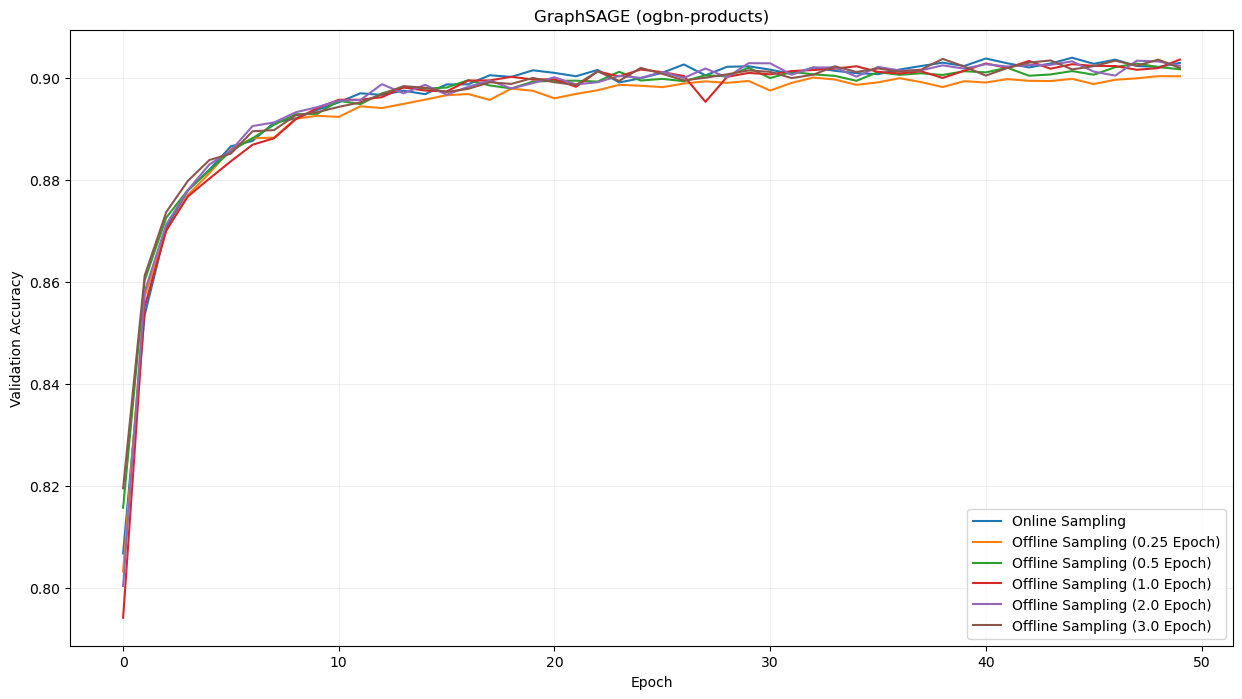

In [7]:
anlyze_data(dfs, 50, 'graphsage_products', 'GraphSAGE (ogbn-products)')

graphsage_reddit
epoch train: 33.91822147655487
total train 1695.9110738277436
mean acc: 0.9554361701011658
worst acc: 0.9554361701011658
best acc: 0.957953929901123
below mean: 0.0
above mean: 0.0025177597999572754
graphsage_reddit_0.25
epoch train: 31.548921814918522
pre sample: 2.9540177822113036
total train 1577.4460907459259
mean acc: 0.9531282782554626
worst acc: 0.948050856590271
best acc: 0.9531282782554626
below mean: 0.00507742166519165
above mean: 0.0
graphsage_reddit_0.5
epoch train: 38.771018712043755
pre sample: 6.029206132888794
total train 1938.550935602188
mean acc: 0.9542612433433532
worst acc: 0.9535478949546814
best acc: 0.9542612433433532
below mean: 0.000713348388671764
above mean: 0.0
graphsage_reddit_1.0
epoch train: 46.59458369255066
pre sample: 10.43486065864563
total train 2329.729184627533
mean acc: 0.9561076164245604
worst acc: 0.954722821712494
best acc: 0.9570727348327636
below mean: 0.0013847947120664283
above mean: 0.000965118408203125
graphsage_reddit_

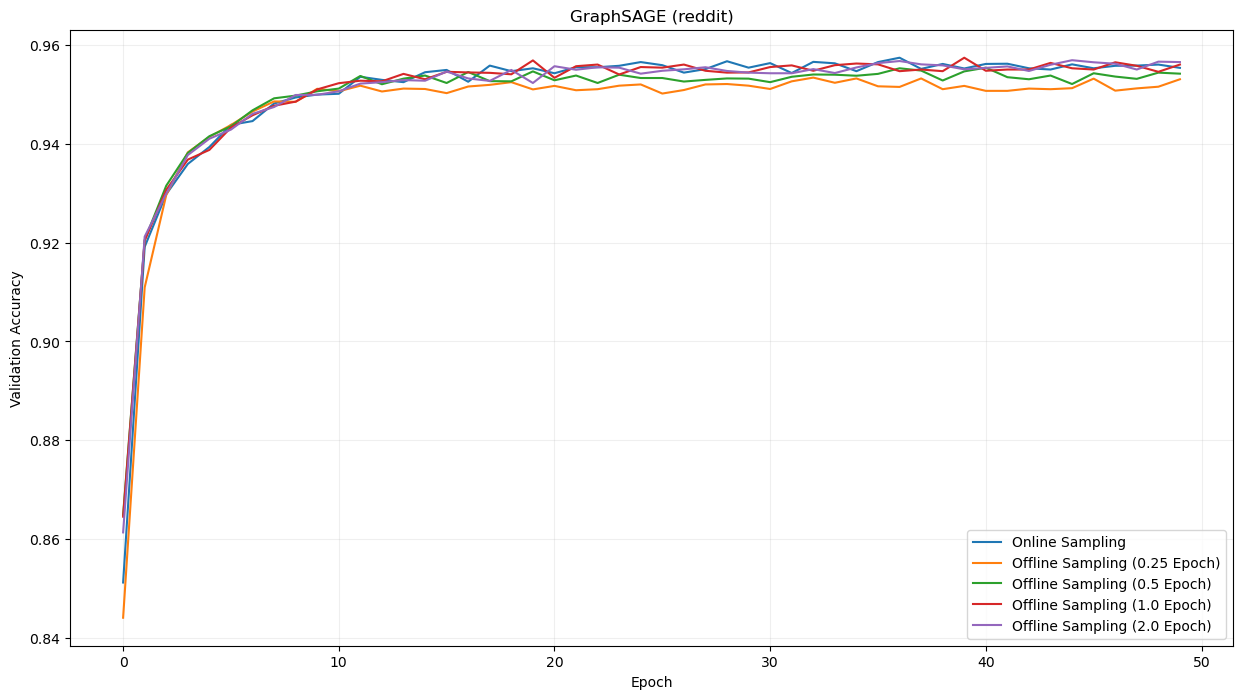

In [10]:
anlyze_data(dfs, 50, 'graphsage_reddit', 'GraphSAGE (reddit)')

ladies_products
epoch train: 9.586137237548828
total train 479.3068618774414
mean acc: 0.7647941708564758
worst acc: 0.760928750038147
best acc: 0.7647941708564758
below mean: 0.0038654208183288574
above mean: 0.0
ladies_products_0.25
epoch train: 3.8618349685668947
pre sample: 2.324791145324707
total train 193.09174842834472
mean acc: 0.7460519671440125
worst acc: 0.7440175414085388
best acc: 0.7512906193733215
below mean: 0.002034425735473633
above mean: 0.005238652229309082
ladies_products_0.5
epoch train: 3.855711505889893
pre sample: 4.691941165924073
total train 192.78557529449463
mean acc: 0.7582076787948608
worst acc: 0.7506548762321472
best acc: 0.7582076787948608
below mean: 0.007552802562713623
above mean: 0.0
ladies_products_1.0
epoch train: 3.8954258279800413
pre sample: 6.9316754817962645
total train 194.77129139900208
mean acc: 0.757037878036499
worst acc: 0.757037878036499
best acc: 0.7594792246818542
below mean: 0.0
above mean: 0.0024413466453552246
ladies_products_2.0

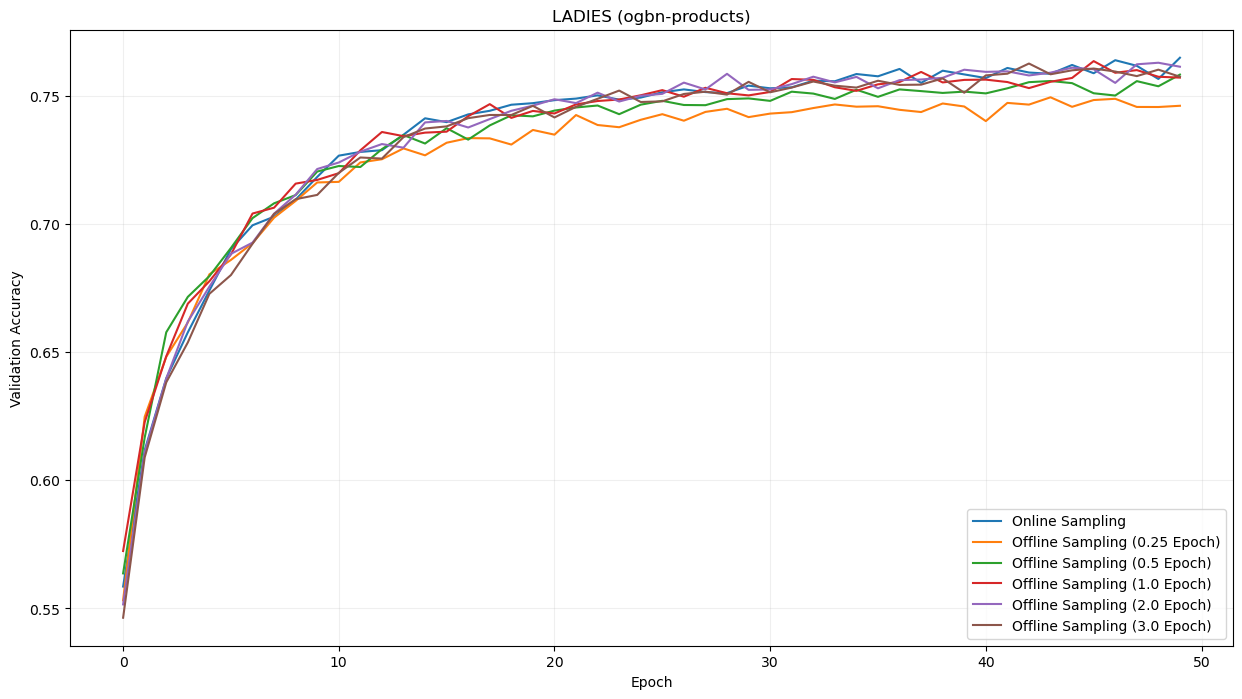

In [9]:
anlyze_data(dfs, 50, 'ladies_products', 'LADIES (ogbn-products)')

In [12]:
df = pd.read_csv('data/ladies.csv')
df1 = pd.read_csv('data/ladies_1.csv')
df2 = pd.read_csv('data/ladies_2.csv')
df3 = pd.read_csv('data/ladies_3.csv')

In [26]:
df['time/s'][3:].mean()

8.631469031597705

In [27]:
df1['time/s'][3:].mean()

3.574336888942313

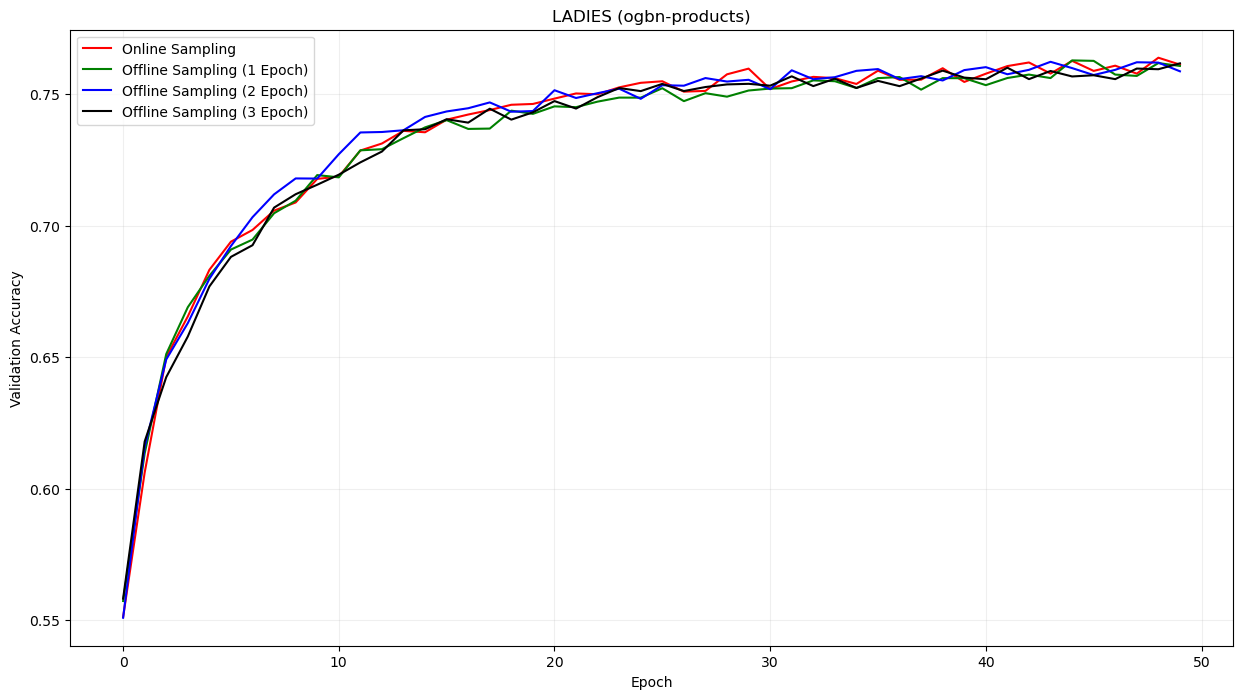

In [20]:
epoch = 50
plt.figure(figsize=(15, 8))
x = range(epoch)
plt.plot(x, df['acc'][:epoch], label='Online Sampling', color="r")
plt.plot(x, df1['acc'][:epoch], label='Offline Sampling (1 Epoch)', color="g")
plt.plot(x, df2['acc'][:epoch], label='Offline Sampling (2 Epoch)', color="b")
plt.plot(x, df3['acc'][:epoch], label='Offline Sampling (3 Epoch)', color="black")
plt.grid(alpha=0.2)
plt.ylabel('Validation Accuracy')
plt.xlabel('Epoch')
plt.title('LADIES (ogbn-products)')
plt.legend()
plt.show()

In [13]:
print(df['time/s'][3:].mean())
print(df1['time/s'][3:].mean())
print(df2['time/s'][3:].mean())
print(df3['time/s'][3:].mean())

8.596044962781335
3.574336888942313
3.5794795066752334
3.5457578466293658


In [14]:
print(df1['presampling time/s'][0])
print(df2['presampling time/s'][0])
print(df3['presampling time/s'][0])

5.531052112579346
11.023811101913452
16.48173713684082
